<a href="https://colab.research.google.com/github/gibranfp/CursoDatosMasivosI/blob/main/notebooks/3a_funciones_dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tablas de dispersión o tablas _hash_
Una tabla _hash_ es una estructura de datos que puede almacenar objetos, la cual permite _insertar_, _eliminar_ y _buscar_ objetos de forma eficiente. 

## Diccionarios en Python
Los diccionarios de Python se llevan a cabo a través de tablas _hash_. Por ej. podemos almacenar 2 conjuntos usando esta estructura de datos. 

In [1]:
o = {}
o['O1']=(0, 2, 0, 4)
o['O2']=(1, 2, 0, 2)
    
print('O1 = {0}, O2 = {1}'.format(o['O1'], o['O2']))

O1 = (0, 2, 0, 4), O2 = (1, 2, 0, 2)


También es posible hacer lo contrario.

In [2]:
o2 = {}
o2[(0,2,0,4)]='O1'
o2[(1,2,0,2)]='O2'

print('(0,2,0,4) = {0}'.format(o2[(0,2,0,4)]))
print('(1,2,0,2) = {0}'.format(o2[(1,2,0,2)]))

(0,2,0,4) = O1
(1,2,0,2) = O2


Más generalmente podemos crear diccionarios usando cualquier tipo o estructura de datos al que se le pueda aplicar la función `hash`.

In [3]:
print('Hash de 1 es {0}'.format(hash(1)))
print('Hash de 3.14 es {0}'.format(hash(3.14)))
print('Hash de \'10\' es {0}'.format(hash('10')))
print('Hash de (1,2) es {0}'.format(hash((1,2))))
print('Hash de (1,2,0,2) es {0}'.format(hash((1,2,0,2))))

Hash de 1 es 1
Hash de 3.14 es 322818021289917443
Hash de '10' es 5179327547278849118
Hash de (1,2) es 3713081631934410656
Hash de (1,2,0,2) es 485695305516660284


## Creando tablas _hash_ en Python
Definimos una clase abstracta para nuestra estructura de datos, especificando sus métodos principales.

In [4]:
from abc import ABC, abstractmethod 

class TablaHash(ABC):
  def __init__(self, n_cubetas):
    self.n_cubetas = n_cubetas
    self.tabla = [[] for i in range(n_cubetas)]

  def __getitem__(self, x):
    return self.tabla[self.h(x)]

  def __repr__(self):
    contenido = ['%d::%s' % (i, self.tabla[i]) for i in range(self.n_cubetas)]
    return "<TablaHash :%s >" % ('\n'.join(contenido))

  def __str__(self):
    contenido = ['%d::%s' % (i, self.tabla[i]) for i in range(self.n_cubetas) if self.tabla[i]]
    return '\n'.join(contenido)

  @abstractmethod
  def h(self, x):
    pass

  @abstractmethod
  def insertar(self, x):
    pass

  @abstractmethod
  def buscar(self, x):
    pass
    
  @abstractmethod
  def eliminar(self, x):
    pass

### Familia $\mathcal{H}$ por método de división
Podemos crear funciones _hash_ $h$ usando el método de división, obteniendo el residuo de la división del valor del objeto y el tamaño de la tabla $m$, esto es,

$$
h(x) = x \mod{m}
$$

donde $m$ es el número de cubetas en la tabla _hash_. Es conveniente usar un número primo para $m$.

Definimos una clase hija de `TablaHash` que implemente la función anterior. Para resolver colisiones usamos encadenamiento, esto es, cada cubeta o registro de la tabla es una lista que contiene todos los objetos que son mapeados al índice correspondiente.

In [5]:
class THMod(TablaHash):
  def h(self, x):
    return x % self.n_cubetas

  def insertar(self, x):
    self.tabla[self.h(x)].append(x)
  
  def buscar(self, x):
    return x in self.tabla[h(x)]
      
  def eliminar(self, x):
    self.tabla[self.h(x)].remove(x)

Probemos nuestra tabla con un conjunto 5 de números

In [6]:
enteros = [1, 10, 36, 78, 93]
n_cubetas = 10

thmod = THMod(n_cubetas)
for i,e in enumerate(enteros):
  thmod.insertar(e)
print(thmod)

0::[10]
1::[1]
3::[93]
6::[36]
8::[78]


¿Qué pasa si tenemos una lista de objetos más grande?

In [7]:
enteros = [12454, 73523, 9865, 12310, 12, 864189, 882113, 27, 36, 39654, 4, 481, 1155, 634, 69, 782, 1232, 9433]
n_cubetas = 10

thmod_mas = THMod(n_cubetas)
for i,e in enumerate(enteros):
  thmod_mas.insertar(e)
print(thmod_mas)

0::[12310]
1::[481]
2::[12, 782, 1232]
3::[73523, 882113, 9433]
4::[12454, 39654, 4, 634]
5::[9865, 1155]
6::[36]
7::[27]
9::[864189, 69]


Para evitar colisiones podemos aumentar el tamaño de la tabla. Suponiendo que  la función anterior es uniforme, ¿cuál sería la probabilidad de colisión si deseamos almacenar $n$ objetos en una tabla de tamaño $m$? Podemos calcular esta probabilidad como el complemento de la probabilidad que no haya colisión.

$$
\begin{align*}
Pr[h(x) = h(y)] & = 1 - P[h(x) \ne h(y)] \\
& =  1 - \frac{m}{m} \times \frac{m - 1}{m} \times \cdots \times \frac{m - n + 1}{m} 
\end{align*}
$$

In [8]:
def cumple(m, n):
  prod = 1
  for i in range(n):
    prod *= (m - i) / m
  
  return 1.0 - prod

Este problema está relacionado a la _paradoja del cumpleaños_, en el cual se tienen un conjunto $n$ de personas y se busca calular la probabilidad de que al menos 2 personas cumplan años el mismo día. En este caso las probabilidades para diferentes valores de $n$ quedan de la siguiente manera:

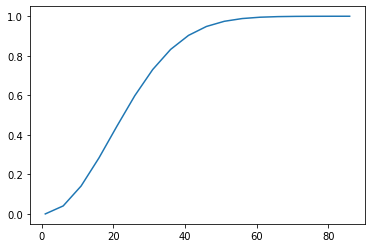

In [9]:
import matplotlib.pyplot as plt

pcs = []
n_personas = range(1,90,5)
for n in n_personas:
  pcs.append(cumple(365, n))

plt.plot(range(1,90,5), pcs)
plt.show()

Regresando al problema de las colisiones en nuestra tabla, las probabilidades para $m = 10$  serían

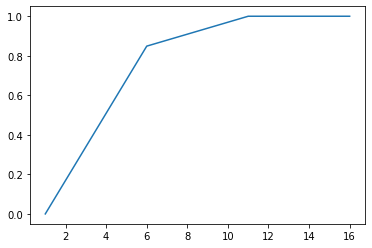

In [10]:
pcs = []
n_personas = range(1,20,5)
for n in n_personas:
  pcs.append(cumple(10, n))

plt.plot(n_personas, pcs)
plt.show()

Podemos hacer más grande el tamaño de la tabla para reducir el número de colisiones. La probabilidad de colisión para $n = 18$ y diferentes valores de $m$ es

In [11]:
emes = range(1, 1500, 100)
n = len(enteros)
probs = []
for m in emes:
  probs.append(cumple(m, n))

En lugar de hacer el cálculo de la probabilidad exacta con la función `cumple`, es posible aproximarla de la siguiente manera:

$$
P[h(x) = h(y)] \approx 1 - e^{\frac{-n^2}{2m}}
$$

In [12]:
from math import exp

def cumple_aprox(m, n):
  return 1.0 - exp((-n**2) / (2 * m))

aprox = []
for m in emes:
  aprox.append(cumple_aprox(m, n))

Graficamos las probabilidades de colisión con diferentes tamaños de tabla calculadas con las 2 estrategias

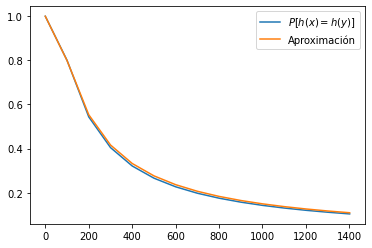

In [13]:
import matplotlib.pyplot as plt

plt.plot(emes, probs, label='$P[h(x) = h(y)]$')
plt.plot(emes, aprox, label='Aproximación')
plt.legend()
plt.show()

Elegimos un número de cubetas un poco más grande

In [14]:
n_cubetas = 281

thmod_grande = THMod(n_cubetas)
for i,e in enumerate(enteros):
  thmod_grande.insertar(e)
print(thmod_grande)

4::[4]
12::[12]
27::[27]
30::[9865]
31::[1155]
33::[39654]
36::[36]
54::[882113]
69::[69]
72::[634]
90::[12454]
108::[1232]
114::[864189]
160::[9433]
182::[73523]
200::[481]
220::[782]
227::[12310]


Veamos cómo escala esta tabla con muchos más números

In [15]:
import numpy as np

conj = np.random.randint(1000, high=5890123, size=200)
thmod_mas_grande = THMod(n_cubetas)
for i,e in enumerate(conj):
  thmod_mas_grande.insertar(e)
print(thmod_mas_grande)

2::[2744529]
4::[491473]
7::[3957611, 4463411]
9::[1321833]
12::[2977488, 721901]
13::[5834978]
15::[2537445, 427135, 2121846]
16::[2181981, 1405859]
18::[2613318]
20::[1605373]
21::[141926]
22::[1734635, 400447]
27::[3408838]
28::[336385]
29::[2806938, 688760, 364486]
30::[3094402, 1845919]
32::[4093359]
39::[4598604]
41::[82093]
45::[2707761]
47::[3651361]
48::[3741282]
52::[2053319, 3103978]
54::[4707928, 3166643]
56::[3042443]
57::[4010489]
60::[1602603]
63::[1680443]
64::[1427544]
69::[44748, 3753386]
71::[1888110]
72::[5859765]
73::[4479775]
74::[1646172, 2153377]
75::[2329565]
76::[687964]
77::[5436865]
80::[3112717]
82::[2617316]
83::[3010155]
85::[3442616]
87::[1077160, 4612983]
90::[2914341]
92::[4532060]
94::[3577224]
95::[3082384, 553384]
96::[5415809, 4305297]
99::[5689506]
103::[122900]
104::[4167896]
105::[5491969]
109::[2741545]
114::[2192476]
115::[4719229]
118::[881615]
121::[2205409]
122::[2316124]
123::[4775999]
126::[5336878]
128::[3310308]
131::[3760473, 3639924]


## Direccionamiento abierto

En lugar de usar encadenamiento, podemos usar direccionamiento abierto resolver colisiones. En esta estrategia, si hay una colisión, se sondean otras cubetas o registros en la tabla hasta encontrar una libre. Si no hay ninguna disponible decimos que la tabla está llena y es necesario aumentar su tamaño para poder almacenar más objetos. 

Para determinar el siguiente índice a examinar es necesario extender la función hash para que incorpore la información de índice. Esta función debe garantizar que se examinen todos los índices en caso de que ninguno esté disponible. 

### Sondeo lineal
Una estrategia común para extender nuestra función _hash_ es el sondeo lineal, el cual está dado por

$$
h(x, i) = (h'(x) + i)\mod{m}
$$


In [16]:
class THModOA(TablaHash):
  def h(self, x, i):
    return (x % self.n_cubetas + i) % self.n_cubetas

  def insertar(self, x):
    llena = True
    for i in range(self.n_cubetas):
      if not self.tabla[self.h(x, i)]:
        self.tabla[self.h(x, i)].append(x)
        llena = False
        break

    if llena:
      print('Tabla llena')

  def buscar(self, x):
    for i in range(self.n_cubetas):
      if self.tabla[self.h(x, i)][0] == x:
        return self.h(x, i)

    return -1

  def eliminar(self, x):
    for i in range(self.n_cubetas):
      if self.tabla[self.h(x, i)][0] == x:
        self.tabla[self.h(x, i)].remove(x)

Intentemos nuevamente con el conjunto anterior usando esta estrategia

In [17]:
thmodoa = THModOA(n_cubetas)
for i,e in enumerate(conj):
  thmodoa.insertar(e)
print(thmodoa)

0::[2027413]
1::[1992284]
2::[2744529]
4::[491473]
7::[3957611]
8::[4463411]
9::[1321833]
12::[2977488]
13::[5834978]
14::[721901]
15::[2537445]
16::[2181981]
17::[427135]
18::[2613318]
19::[2121846]
20::[1405859]
21::[141926]
22::[1734635]
23::[400447]
24::[1605373]
27::[3408838]
28::[336385]
29::[2806938]
30::[3094402]
31::[1845919]
32::[4093359]
33::[688760]
34::[364486]
39::[4598604]
41::[82093]
45::[2707761]
47::[3651361]
48::[3741282]
52::[2053319]
53::[3103978]
54::[4707928]
55::[3166643]
56::[3042443]
57::[4010489]
60::[1602603]
63::[1680443]
64::[1427544]
69::[44748]
70::[3753386]
71::[1888110]
72::[5859765]
73::[4479775]
74::[1646172]
75::[2153377]
76::[2329565]
77::[687964]
78::[5436865]
80::[3112717]
82::[2617316]
83::[3010155]
85::[3442616]
87::[1077160]
88::[4612983]
90::[2914341]
92::[4532060]
94::[3577224]
95::[3082384]
96::[5415809]
97::[553384]
98::[4305297]
99::[5689506]
103::[122900]
104::[4167896]
105::[5491969]
109::[2741545]
114::[2192476]
115::[4719229]
118::[88

## Familias por método de multiplicación
Otra estrategia para diseñar funciones _hash_ es el de multiplicación. En este método primero se multiplica el objeto $x$ por una constante $a \in (0,1)$ y se extrae la parte fraccional de $a x$. Posteriormente, se multiplica este valor por $m$ y se toma la función piso $\lfloor\rfloor$
$$
h(x) = \lfloor m (x a \mod 1)\rfloor
$$

donde $a$ es una constante.

In [18]:
from math import floor, sqrt

class THMult(TablaHash):
  def __init__(self, n_cubetas, a):
    self.n_cubetas = n_cubetas
    self.tabla = [[] for i in range(n_cubetas)]
    self.a = a
  
  def h(self, x, i):
    return (floor(((self.a * x) % 1) * self.n_cubetas) + i) % self.n_cubetas

  def insertar(self, x):
    llena = True
    for i in range(self.n_cubetas):
      if not self.tabla[self.h(x, i)]:
        self.tabla[self.h(x, i)].append(x)
        llena = False
        break

    if llena:
      print('Tabla llena')

  def buscar(self, x):
    for i in range(self.n_cubetas):
      if self.tabla[self.h(x, i)][0] == x:
        return self.h(x, i)

    return -1

  def eliminar(self, x):
    for i in range(self.n_cubetas):
      if self.tabla[self.h(x, i)][0] == x:
        self.tabla[self.h(x, i)].remove(x)

Aunque $a$ puede tomar cualquier valor en el intervalo $(0,1)$, hay algunos valores que funcionan mejor que otros. Donald Knuth recomienda $a \approx \frac{\sqrt{5} - 1}{2}$

In [19]:
thm = THMult(281, (sqrt(5) - 1) / 2)
for i,e in enumerate(conj):
  thm.insertar(e)
print(thm)

1::[3166643]
4::[3577224]
5::[491473]
7::[4863540]
9::[881615]
10::[5415809]
11::[5594982]
12::[2082193]
13::[5278857]
14::[77245]
15::[2162708]
16::[5644023]
20::[4644900]
21::[3223229]
22::[3082384]
23::[2501170]
24::[2806938]
25::[141926]
26::[5689506]
27::[688760]
28::[5294031]
29::[1605373]
30::[1247273]
31::[3957611]
32::[678492]
33::[4532060]
34::[1602603]
35::[3760473]
36::[5877287]
37::[237581]
38::[687964]
39::[553384]
40::[2482896]
41::[3753386]
42::[4076899]
43::[5537652]
44::[4501298]
45::[1888110]
46::[5377732]
47::[3010155]
48::[2756305]
49::[453176]
50::[2153377]
51::[5275770]
52::[3042443]
53::[3725182]
54::[2027413]
55::[1183809]
56::[1775011]
57::[3651361]
58::[2744529]
59::[4479775]
63::[1992284]
64::[465334]
66::[665268]
67::[1862940]
68::[274495]
69::[5010974]
70::[4519247]
71::[1646172]
72::[3296290]
73::[2617316]
74::[82093]
75::[2537445]
76::[1787949]
79::[4612983]
82::[4523996]
83::[2545155]
87::[1744623]
88::[1751621]
89::[3254417]
91::[4418120]
92::[5438072]

## Ejercicio
Realiza lo siguiente:
+ Implementa una tabla que realice sondeo cuadrático.

$$
h(x, i) = (h'(x) + c_1i + c_2i^2)\mod{m}
$$

+ Desarrolla un programa que cuente el número de ocurrencias de todas las subcadenas de longitud entre 5 a 10 (sin considerar espacios en blanco ni signos de admiración/interrogación ni caracteres especiales) usando funciones y tablas _hash_.
